In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# Numerical libraries
import numpy as np   


# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
# reading the CSV file into pandas dataframe
bank_df = pd.read_csv("D:/D_DATA/CODE\Python/SupervisedLearning_Bank Personal loan modelling/Bank_Personal_Loan_Modelling-1.csv")  

In [4]:
# Check top few records to get a feel of the data structure
print(bank_df.head(5))
print(bank_df.shape)
print(bank_df.dtypes)

print(bank_df.isnull().values.all(), bank_df.isnull().sum().sum())


# Let us check whether any of the columns has any value other than numeric
print(bank_df[~bank_df.applymap(np.isreal).all(1)])

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
(5000, 14)
ID                      int64
Age                     int64
Experience            

In [5]:
#Lets analysze the distribution of the dependent (Personal Loan) and independent columns

print(bank_df['Personal Loan'].unique())
print(bank_df['Personal Loan'].value_counts())
bank_df.describe().transpose()
#print("Mortage: \n", bank_df['Mortgage'].value_counts())
print("Securities Account: \n", bank_df['Securities Account'].value_counts())
print("CD Account: \n", bank_df['CD Account'].value_counts())
print("Online: \n", bank_df['Online'].value_counts())
print("CreditCard: \n", bank_df['CreditCard'].value_counts())


[0 1]
0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account: 
 0    4478
1     522
Name: Securities Account, dtype: int64
CD Account: 
 0    4698
1     302
Name: CD Account, dtype: int64
Online: 
 1    2984
0    2016
Name: Online, dtype: int64
CreditCard: 
 0    3530
1    1470
Name: CreditCard, dtype: int64


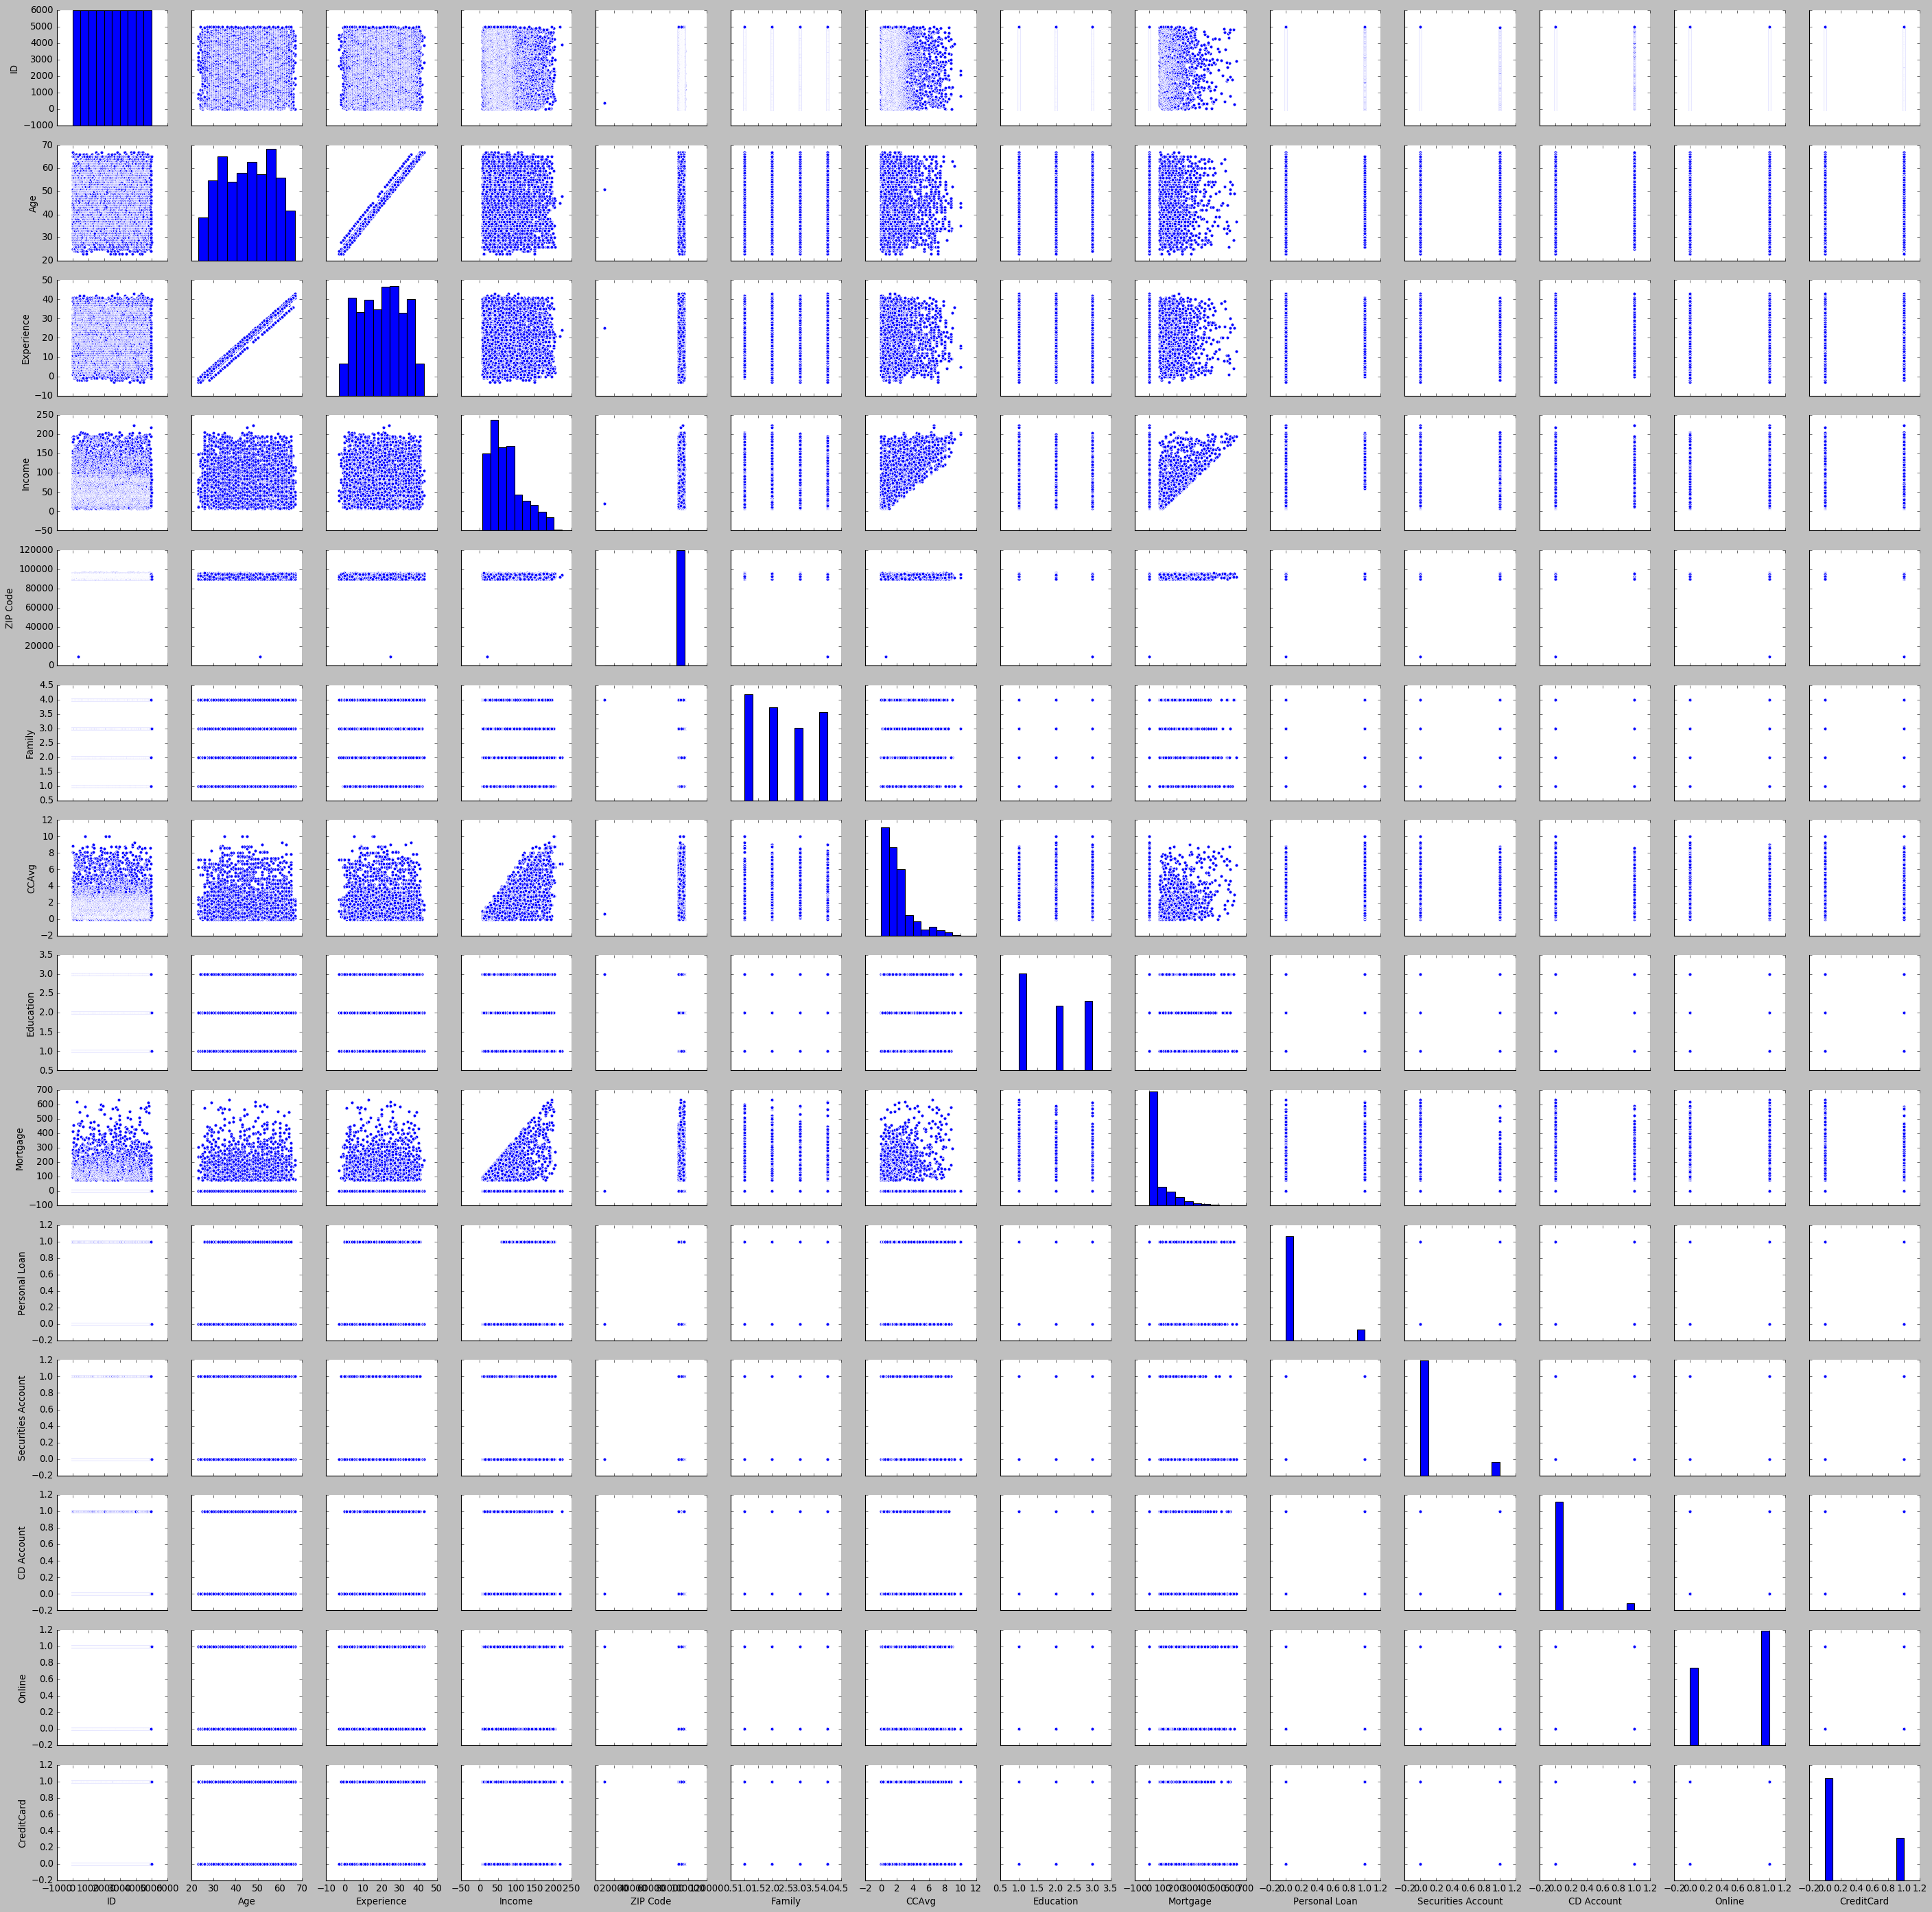

In [6]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension


sns.pairplot(bank_df)


#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right
# Attributes which look normally distributed (plas, pres, skin, and mass).

#Question2: Study the data distribution in each attribute, share your findings. (5 points)
#Ans: 
#1. Mortgage median is zero. Many customers do not have mortgage. Mean is over 56 which indicates heavy outliers leading to extreme long tail on the right. 
#2. Pretty much all of th Attributes have skewed distribution. 




#Question3: Get the target column distribution. Your comments
#Ans: Out of 5000 samples, 4520 samples did not have personal loan and 480 samples had personal loan.
# Most  do not have personal loan. The ratio is almost 10:1 in favor of class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


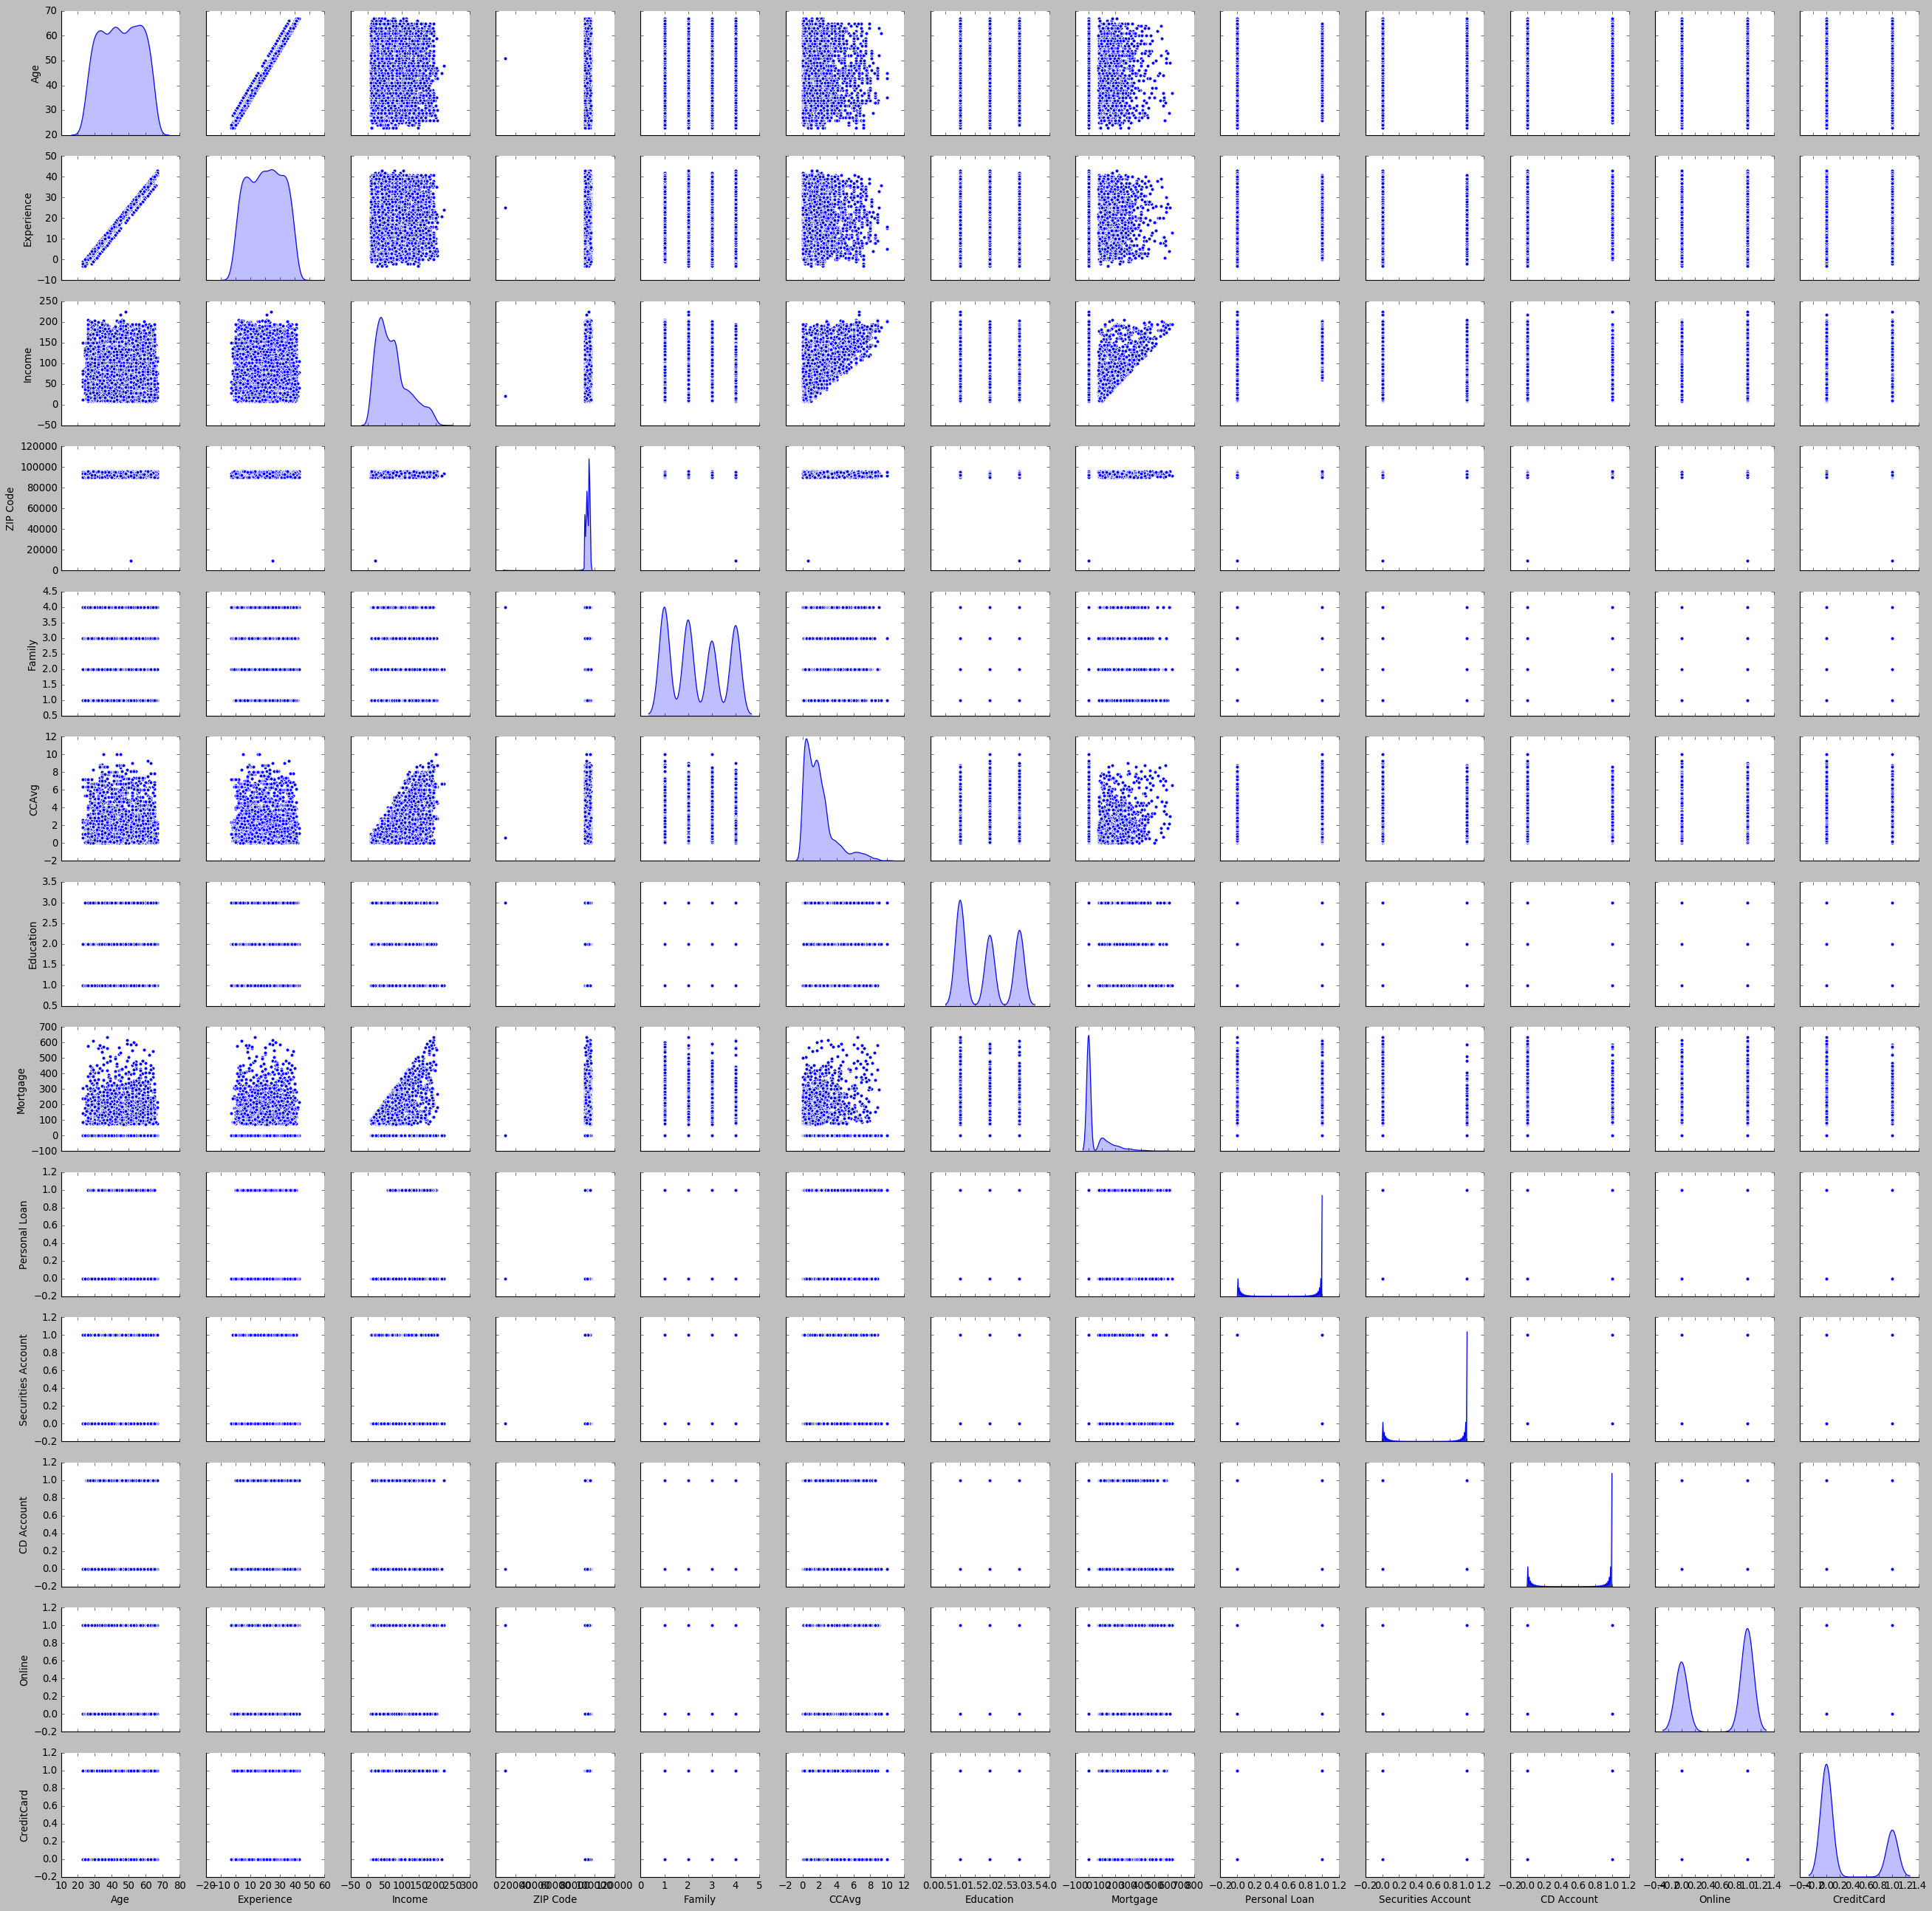

In [22]:
sns.pairplot(bank_df , diag_kind = 'kde')

In [8]:
# Copy all the predictor variables into X dataframe and drop the dependent variable
bank_df = bank_df.drop('ID', axis=1)
X = bank_df.drop('Personal Loan', axis=1)
#X = X.drop({'origin_america', 'origin_asia' ,'origin_europe'}, axis=1)

# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
y = bank_df[['Personal Loan']]


In [10]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [21]:
# Train and fit the model using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_predict_logistic = model_logistic.predict(X_test)
model_score_logistic = model_logistic.score(X_test, y_test)
print(model_score_logistic)
#Logisitc regression Confusion matrix
print(metrics.confusion_matrix(y_test, y_predict_logistic))

#Logistic regression
#True positive: Logistic regression correctly predicted the likelihood for liability customers buying personal loan for 43 customers. 
#True Negative: Correctly predicted 1318 do not have personal loan. 
#False positive: Incorrectly predicted 33 personal loan customers as not having personal loan. (Type I Error)
#False negative: Incorrectly predicted 106 customers as having personal loan when they do not (Type II Error)


print(model_logistic.coef_)

pd.DataFrame(model_logistic.predict_proba(X_test))


0.9073333333333333
[[1318   33]
 [ 106   43]]
[[-5.28144247e-04 -2.00981334e-03  3.60894624e-02 -6.57408494e-05
   1.51654198e-02  9.45357884e-03  1.64466922e-02  8.33432905e-04
   5.34311124e-04  4.68095183e-03 -1.76671338e-04 -6.68865172e-05]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,0.943699,0.056301
1,0.985460,0.014540
2,0.992597,0.007403
3,0.870025,0.129975
4,0.965558,0.034442
5,0.995852,0.004148
6,0.985664,0.014336
7,0.911623,0.088377
8,0.897144,0.102856
9,0.926660,0.073340


In [61]:
# Train and fit the model using Naive Bayes regression
from sklearn.naive_bayes import GaussianNB

model_NaiveBayes = GaussianNB()
model_NaiveBayes.fit(X_train, y_train)
y_predict_NaiveBayes = model_NaiveBayes.predict(X_test)
model_score_NaiveBayes = model_NaiveBayes.score(X_test, y_test)

print(model_NaiveBayes.score(X_train , y_train))
#from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_predict_NaiveBayes))

#Naive Bayes Confusion matrix
print(metrics.confusion_matrix(y_test, y_predict_NaiveBayes))

#Naive Bayes regression
#True positive: Logistic regression correctly predicted the likelihood for liability customers buying personal loan for 85 customers. 
#True Negative: Correctly predicted 1241 do not have personal loan. 
#False positive: Incorrectly predicted 110 personal loan customers as not having personal loan. (Type I Error)
#False negative: Incorrectly predicted 64 customers as having personal loan when they do not (Type II Error)

#Question: Give your reasoning on which is the best model in this case and why it performs better? (5 points)
#Overall accuracy for logistic regression is better than Naive Bayes. 



0.8942857142857142
0.884
[[1241  110]
 [  64   85]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
